In [1]:
#import necessary packages
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

Below code "files.upload()" is used to upload files from the local system to the Colaboratory notebook. When this command is executed, it prompts the user to select files from their local system to upload to the Colaboratory notebook.

In [ ]:
#upload the tweets dataset
from google.colab import files
files.upload()

In [ ]:
#list files in current directory
!ls

sample_data  Tweets.csv


In [4]:
#read tweets dataset using read_csv
data_df = pd.read_csv("Tweets.csv")

In [5]:
#display top 5 rows
data_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#display bottom 5 rows
data_df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [7]:
#print columns names
for i in enumerate(data_df.columns):
  print(i)

(0, 'tweet_id')
(1, 'airline_sentiment')
(2, 'airline_sentiment_confidence')
(3, 'negativereason')
(4, 'negativereason_confidence')
(5, 'airline')
(6, 'airline_sentiment_gold')
(7, 'name')
(8, 'negativereason_gold')
(9, 'retweet_count')
(10, 'text')
(11, 'tweet_coord')
(12, 'tweet_created')
(13, 'tweet_location')
(14, 'user_timezone')


Iterate through the columns of a pandas DataFrame named "data_df" using a for loop. The "enumerate" function is being used to construct a series of pairs, each of which has an index number and a column name from the DataFrame.

The for loop iterates over each pair, assigning them to the variable "i" in turn. The print() method is used on each iteration of the loop to output the value of "i" to the console. Because "i" is a pair, the output will include both the index number and the column name of the DataFrame column.

In [8]:
#check if there are any null values in text column
data_df['text'].isnull().sum()

0

On that column, the ".isnull()" method is being called to generate a Boolean mask indicating which cells in the column contain null values.

The Boolean mask is then subjected to the ".sum()" method, which counts the number of True values in the mask. Because True is treated as 1 and False as 0, the result is the number of null cells in the "text" column. We are now counting the number of null entries in the "text" column of a pandas DataFrame.

In [9]:
data_df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

We are counting each unique value in the DataFrame's "airline_sentiment" column, with the most common entries shown first. This can help you understand how sentiment labels are distributed in the dataset.

<Axes: >

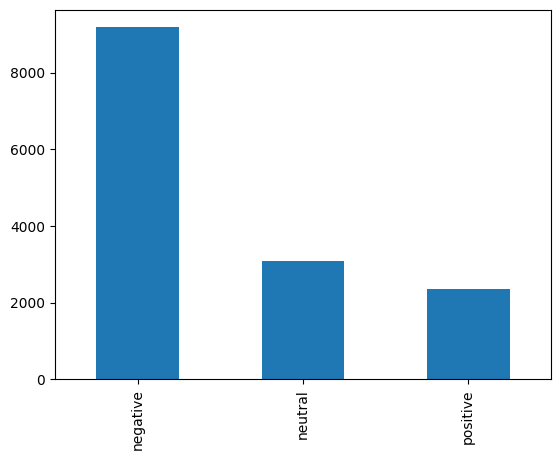

In [10]:
data_df['airline_sentiment'].value_counts().plot(kind='bar')

In [11]:
#convert to 'text' lower case
data_df['text'] = data_df['text'].str.lower()
data_df['text'][12]

"@virginamerica this is such a great deal! already thinking about my 2nd trip to @australia &amp; i haven't even gone on my 1st trip yet! ;p"

To change all text in the "text" column to lowercase characters, the ".str.lower()" method is performed on that column.

In [12]:
# remove the url links
def remove_tags(text):
  return re.sub(r"http\S+", "", text)


data_df['text'] = data_df['text'].apply(lambda x: remove_tags(x))
data_df['text'][12]

"@virginamerica this is such a great deal! already thinking about my 2nd trip to @australia &amp; i haven't even gone on my 1st trip yet! ;p"

The "remove_tags" function is defined, which accepts a text string as input and uses the "re" module to remove any URLs (web links) in the text. The regular expression pattern <b>"httpS+"</b> matches any string beginning with "http" and ending with any non-whitespace character.

The ".apply()" method is then invoked on the "text" column of the "data_df" DataFrame, and the "remove_tags" function is applied using a lambda function to each cell in the column. This modifies the DataFrame's "text" column by eliminating URLs from each cell.

In [13]:
def remove_hash(text):
  return re.sub(r'@[A-Za-z0-9]+', "", text)

data_df['text'] = data_df['text'].apply(lambda x: remove_hash(x))
data_df['text'][12]

" this is such a great deal! already thinking about my 2nd trip to  &amp; i haven't even gone on my 1st trip yet! ;p"

A function named "remove_hash" is defined, which takes a text string as input and utilizes the "re" module to remove any Twitter usernames (which begin with "@" followed by alphanumeric letters) in the text. The regular expression pattern <b>"@[A-Za-z0-9]+"</b> is used to match any string that begins with "@" and contains one or more alphanumeric characters.

In [14]:
def remove_whitespace(text):
  return re.sub(r'[^\w\s]', "", text)

data_df['text'] = data_df['text'].apply(lambda x: remove_whitespace(x))

There is a function entitled "remove_whitespace" that takes a text string as input and utilizes the "re" module to remove any non-alphanumeric characters (that is, any character that is not a letter, number, or whitespace) in the text. The regular expression pattern <b>"[ws]"</b> is used to match any non-word character (i.e., letter or number) or whitespace.

In [15]:
nltk.download('punkt')

#tokenize words
def tokenize_words(text):
  return nltk.word_tokenize(text)

data_df['text'] = data_df['text'].apply(lambda x: tokenize_words(x))
data_df['text'][12]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['this',
 'is',
 'such',
 'a',
 'great',
 'deal',
 'already',
 'thinking',
 'about',
 'my',
 '2nd',
 'trip',
 'to',
 'amp',
 'i',
 'havent',
 'even',
 'gone',
 'on',
 'my',
 '1st',
 'trip',
 'yet',
 'p']

The Natural Language Toolkit (nltk) module "punkt" is downloaded using the "nltk.download()" function. The "punkt" module includes a tokenizer for splitting text into distinct words.

The function <b>"tokenize_words"</b> is then defined, which takes a text string as input and tokenizes it into individual words using the <b>"nltk.word_tokenize()"</b> function.
Using a lambda function, the "tokenize_words" function is applied to each cell in the column. This updates the DataFrame's "text" column by tokenizing each cell into a list of words.

Tokenization is a critical step in many natural language processing activities since it divides text into constituent words, making it easier to examine and process.

In [16]:
nltk.download('stopwords')

#remove stopwords
def remove_stopwords(text):
  stopwords = nltk.corpus.stopwords.words('english')
  temp = [token for token in text if token not in stopwords]
  return temp

data_df['text'] = data_df['text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The Natural Language Toolkit (nltk) module "stopwords" is downloaded using the "nltk.download()" function. The "stopwords" module provides a list of often used stop words that can be deleted from text in order to improve natural language processing tasks.

The <b>"remove_stopwords"</b> function is then defined, which takes a list of tokens (i.e., words) as input and utilizes the "stopwords" module to remove any stop words from the list. <b>"nltk.corpus.stopwords.words('english')"</b> returns the stop words for English.

The list comprehension phrase "temp = [token for token in text if token not in stopwords]" is used to construct a new list "temp" that only includes tokens from the original list "text" that are not stop words.

In [17]:
# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data_df['text'] = data_df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


The Natural Language Toolkit (nltk) "wordnet" module is downloaded using the "nltk.download()" function. The "wordnet" module gives you access to the WordNet lexical database, which you can use to lemmatize.

The <b>"WordNetLemmatizer()"</b> function is then used to build a WordNetLemmatizer object. The WordNetLemmatizer is a tool for converting words into their base form, or lemma.

A lambda function is used to define a function that applies the WordNetLemmatizer to each word in a list of words.

Lemmatization is a technique for reducing the dimensionality of text data and improving the performance of natural language processing tasks such as text classification.

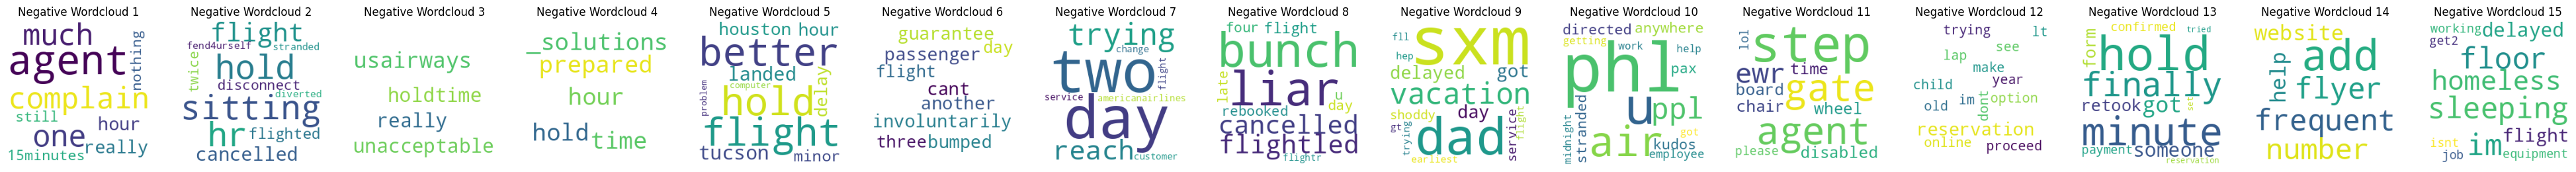

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=15, figsize=(50, 65))

for i in range(0,15):
    text = data_df[data_df['airline_sentiment'] == 'negative']['text']
    random_index = random.randint(0, len(text))
    words = ' '.join(text.iloc[random_index])
    wordcloud = WordCloud(width=250, height=250, background_color='white', min_font_size=10, max_words=15).generate(words)
    axs[i].imshow(wordcloud)
    axs[i].axis("off")
    axs[i].set_title(f"Negative Wordcloud {i+1}")

Using the matplotlib library, we constructed a figure with a row of 15 subplots. The subplots are saved in the "axs" variable, and the figure size is set to 50 by 65.

After that, a loop is executed 15 times with the loop variable "i" ranging from 0 to 14. Using a conditional statement to filter for negative sentiment, a random negative tweet is taken from the "text" column of the "data_df" DataFrame for each iteration of the loop. To generate random numbers, the "random" module is imported at the beginning of the function.

The "WordCloud()" constructor from the wordcloud library is used to generate a WordCloud object, with the "width", "height", "background_color", "min_font_size", and "max_words" arguments supplied. The WordCloud object's "generate()" method is then executed, with the linked words as input. This creates a word cloud representation of the tweet's most commonly recurring words.

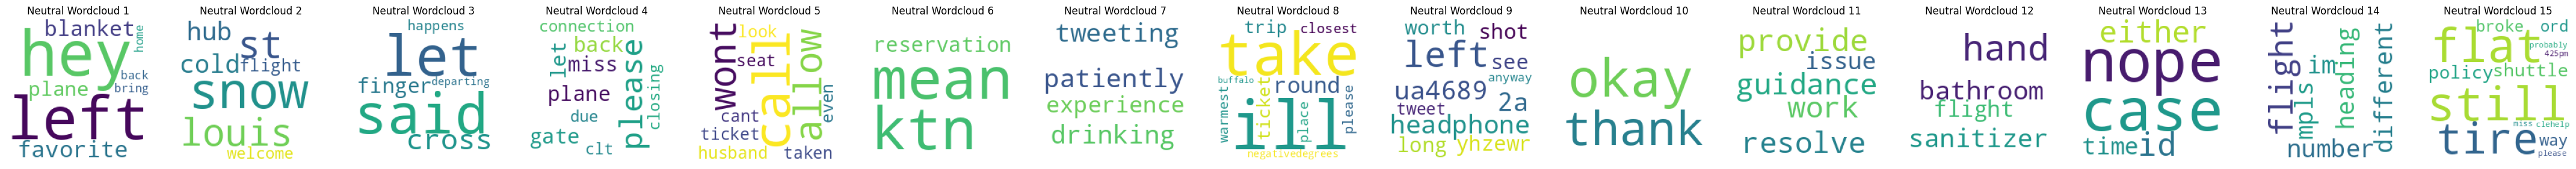

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=15, figsize=(55, 65))

for i in range(0,15):
    text = data_df[data_df['airline_sentiment'] == 'neutral']['text']
    random_index = random.randint(0, len(text))
    words = ' '.join(text.iloc[random_index])
    wordcloud = WordCloud(width=200, height=200, background_color='white', min_font_size=10, max_words=15).generate(words)
    axs[i].imshow(wordcloud)
    axs[i].axis("off")
    axs[i].set_title(f"Neutral Wordcloud {i+1}")


As explained above we are doing the same for <b>'neutral'.</b> 

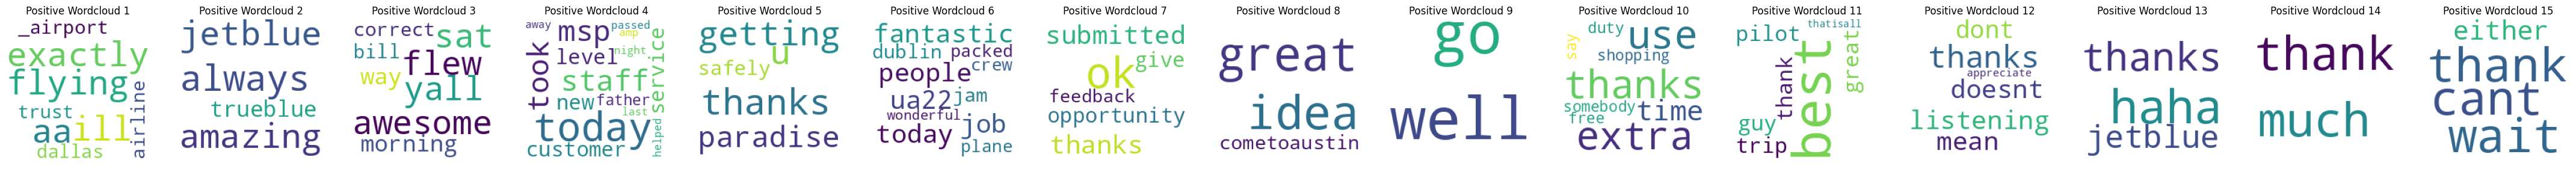

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=15, figsize=(55, 65))

for i in range(0,15):
    text = data_df[data_df['airline_sentiment'] == 'positive']['text']
    random_index = random.randint(0, len(text))
    words = ' '.join(text.iloc[random_index])
    wordcloud = WordCloud(width=200, height=200, background_color='white', min_font_size=10, max_words=15).generate(words)
    axs[i].imshow(wordcloud)
    axs[i].axis("off")
    axs[i].set_title(f"Positive Wordcloud {i+1}")

As explained above we are doing the same for <b>'positive'.</b> 

Word clouds are a popular approach to visualize text data by displaying the most frequently occurring terms in a corpus, and they can be beneficial for getting insight into the themes and topics contained in a text collection.

In [26]:
from nltk.probability import FreqDist

for i in data_df['airline_sentiment'].value_counts().index:
  words = data_df[data_df['airline_sentiment'] == i]['text'].sum()
  fdist = FreqDist(words)
  top_5_words = fdist.most_common(5)
  print("TOP 5 MOST USED WORDS FOR " + str(i.upper() + " SENTIMENT"))
  df = pd.DataFrame(top_5_words, columns =['Words', 'Frequency'])
  display(df.head())


TOP 5 MOST USED WORDS FOR NEGATIVE SENTIMENT


,Words,Frequency
0,flight,3320
1,hour,1079
2,get,1009
3,cancelled,920
4,customer,773


TOP 5 MOST USED WORDS FOR NEUTRAL SENTIMENT


,Words,Frequency
0,flight,766
1,get,241
2,need,179
3,please,179
4,help,164


TOP 5 MOST USED WORDS FOR POSITIVE SENTIMENT


,Words,Frequency
0,thanks,609
1,thank,453
2,flight,433
3,great,233
4,service,162


To iterate through the sentiment categories in the DataFrame, we utilized a loop. The tweets in each category are concatenated into a single string for each category using the "sum()" function on the filtered DataFrame's "text" column.

The <b>FreqDist()</b> method from the nltk.probability module is then used to compute the frequency distribution of the words in the concatenated string. This produces a dictionary-like object, with the keys being the various words in the string and the values being the frequency count of each word.

Then we used the <b>"most_common()"</b> method on the FreqDist object, passing in the argument "5" to get the top 5 most frequently occurring words in the string. The end output is a list of tuples, each containing a word and its frequency count.

constructed a DataFrame using the tuple list as input and column names "Words" and "Frequency" The DataFrame is then shown using the "head()" method, which displays only the top five most frequently used words for each sentiment category.

<h2>Summary</h2> 

<p align="justify">The analysis of word frequencies in the airline customer tweets suggests that negative emotions are closely tied to problems with flying, such as <b>"cancellations"</b> and long wait times. The mention of <b>"customers"</b> in <b>Negative</b> tweets implies that they are dissatisfied with the service they received.

On the other hand, <b>Neutral</b> sentiment tweets tend to include words like <b>"need"</b> and <b>"help"</b> which suggest customers seeking information or assistance, without necessarily expressing a positive or negative attitude towards the airline.

<b>Positive</b> sentiment tweets, however, frequently include expressions of gratitude and satisfaction with the airline's service, such as <b>"thanks"</b> and <b>"great."</b> This indicates that customers are pleased with their experience and appreciate the assistance they received.

These findings highlight the importance for airlines to address customer complaints promptly and effectively, especially those related to flight issues and customer service. Additionally, acknowledging and responding to positive sentiment can help build brand loyalty and promote positive word-of-mouth.

Overall, understanding the language customers use in their tweets can provide valuable insights for airlines looking to improve their services and enhance customer satisfaction.</p>